# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Sisy Agnia Rachmi
- **Email:** sisyagniarachmi@gmail.com
- **ID Dicoding:** sisyagniar

## Menentukan Pertanyaan Bisnis

1. Bagaimana pengaruh cuaca terhadap jumlah peminjaman sepeda?
2. Bagaimana perbandingan jumlah peminjaman sepeda antara hari kerja, akhir pekan, dan hari libur?
3. Apakah peminjaman sepeda meningkat atau menurun pada tahun 2012 dibanding tahun 2011?

## Import Semua Packages/Library yang Digunakan

Memuat library yang akan digunakan untuk analisis data.

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

**Memuat tabel hour**

Pada tahap ini akan memuat tabel hour yang bersumber dari github dan menampilkan 5 buah baris pertama dari tabel.

In [111]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/ssygnrchm/Proyek-Analisis-Data-Dicoding/refs/heads/main/dataset/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

**Menilai data hour_df**

pada tahap ini akan dilakukan penilaian pada data, dimana akan dilakukan pengecekan untuk *missing value*, *inaccurate value*, *inconsisten value*, dan *outlier*

In [112]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Pada kolom dteday tipe data object kurang sesuai dengan data pada kolom tersebut yang berisi tanggal penyewaan sepeda. Kita dapat menggantinya menjadi datetime pada tahap cleaning data

In [113]:
hour_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


Tidak ada *missing value* pada data hour_df

In [114]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


*   Tidak ada duplikasi pada data
*   Terdapat keanehan pada data di kolom hum, dimana nilai min hum adalah 0.0
*   Terdapat keanehan pada data di kolom windspeed, dimana nilai min windspeed adalah 0.0



In [115]:
print("Jumlah data dengan kelembapan 0:", hour_df[hour_df['hum'] == 0].shape[0])

hour_df[hour_df['hum'] == 0.0]


Jumlah data dengan kelembapan 0: 22


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1551,1552,2011-03-10,1,0,3,0,0,4,1,3,0.34,0.3182,0.0,0.2537,3,0,3
1552,1553,2011-03-10,1,0,3,1,0,4,1,3,0.34,0.3182,0.0,0.2537,0,2,2
1553,1554,2011-03-10,1,0,3,2,0,4,1,3,0.34,0.3182,0.0,0.2537,0,1,1
1554,1555,2011-03-10,1,0,3,5,0,4,1,3,0.36,0.3485,0.0,0.1940,1,2,3
1555,1556,2011-03-10,1,0,3,6,0,4,1,3,0.36,0.3333,0.0,0.3284,0,12,12
1556,1557,2011-03-10,1,0,3,7,0,4,1,3,0.38,0.3939,0.0,0.2239,1,36,37
1557,1558,2011-03-10,1,0,3,8,0,4,1,3,0.38,0.3939,0.0,0.2836,1,43,44
1558,1559,2011-03-10,1,0,3,9,0,4,1,3,0.40,0.4091,0.0,0.2239,1,23,24
1559,1560,2011-03-10,1,0,3,10,0,4,1,3,0.40,0.4091,0.0,0.1642,0,17,17
1560,1561,2011-03-10,1,0,3,11,0,4,1,3,0.40,0.4091,0.0,0.2537,6,5,11


In [116]:
print("Jumlah data dengan kecepatan angin 0:", hour_df[hour_df['windspeed'] == 0].shape[0])

hour_df[hour_df['windspeed'] == 0.0]

Jumlah data dengan kecepatan angin 0: 2180


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17319,17320,2012-12-29,1,1,12,12,0,6,0,3,0.20,0.2424,1.00,0.0,5,43,48
17320,17321,2012-12-29,1,1,12,13,0,6,0,3,0.20,0.2424,1.00,0.0,13,71,84
17322,17323,2012-12-29,1,1,12,15,0,6,0,2,0.24,0.2424,0.87,0.0,19,110,129
17330,17331,2012-12-29,1,1,12,23,0,6,0,2,0.26,0.2424,0.60,0.0,0,32,32


**Insight:**
- Tipe data object pada dteday kurang sesuai
- Tidak ada missing value ataupun duplicated data pada tabel hour
- Kolom hum memiliki nilai min 0.00 yang patut dicurigai. Karena kelembaban relatif jarang mencapai 0% dan konteks data ini diambil di Washington DC yang memiliki iklim subtropis yang selalu memiliki kelembaban di udara. Terdapat 22 data pada hour_df yang memiliki nilai 0.00 pada kolom hum dimana seluruh data tercatat pada hari yang sama dan di kondisi cuaca pada hari itu mayoritas adalah kondisi 3(Hujan ringan, badai petir ringan, atau salju ringan). Dengan kondisi cuaca tersebut kondisi dimana hum 0% semakin tidak memungkinkan. Berdasarkan kondisi yang telah dijelaskan dan sedikitnya jumlah data dengan kolom hum = 0.00, memungkinkan nilai hum = 0.0 merupakan inaccurate value ataupun outlier.
- Kolom windspeed memiliki nilai min 0.00 yang patut dicurigai. Terdapat 2180 data yang memiliki nilai windspeed = 0.0. Nilai 0.0 pada windspeed berarti kecepatan angin sebesar 0 km/jam atau tidak ada angin sama sekali. Akan tetapi hal ini masih wajar terjadi karena kondisi yang tenang sehingga menyebabkan kecepatan angin yang sangat lemah atau tidak ada angin sama sekali. Oleh karena itu data ini akan dibiarkan tetap pada bentuk awal.

### Cleaning Data

pada tahapan ini akan dilakukan *data cleaning* yang meliputi penggantian tipe data yang kurang sesuai dan penghapusan *incorrect value* dan *outlier* pada data

**1. Menghapus data dengan nilai hum = 0.0**

In [117]:
hour_df_cleaned = hour_df[hour_df['hum'] != 0.0]
hour_df_cleaned.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17357.000000,17357.000000,17357.000000,17357.000000,17357.000000,17357.000000,17357.000000,17357.000000,17357.000000,17357.000000,17357.000000,17357.000000,17357.000000,17357.000000,17357.000000,17357.000000
mean,8699.034107,2.503543,0.503198,6.542260,11.545889,0.028807,3.002420,0.682318,1.423403,0.497124,0.475889,0.628024,0.190007,35.718788,153.948551,189.667339
std,5013.782462,1.106327,0.500004,3.438645,6.914537,0.167268,2.006728,0.465588,0.637492,0.192635,0.171921,0.191754,0.122342,49.321693,151.382189,181.409297
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.080000,0.000000,0.000000,0.000000,1.000000
25%,4362.000000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8701.000000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,116.000000,142.000000
75%,13040.000000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


data dengan nilai hum = 0.0 telah dihapus dan nilai min pada kolom hum berubah dari 0.0 menjadi 0.08


---



*Mengapa dilakukan penghapusan data?*

Karena data yang mempunyai nilai hum = 0.0 hanya sedikit yaitu 22 data, maka penghapusan data tidak akan berpengaruh signifikan terhadap proses analisis data yang akan dilakukan selanjutnya.

**2. Mengonversi Tipe Data dteday**

In [118]:
hour_df_cleaned['dteday'] = pd.to_datetime(hour_df_cleaned['dteday'])
hour_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17357 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17357 non-null  int64         
 1   dteday      17357 non-null  datetime64[ns]
 2   season      17357 non-null  int64         
 3   yr          17357 non-null  int64         
 4   mnth        17357 non-null  int64         
 5   hr          17357 non-null  int64         
 6   holiday     17357 non-null  int64         
 7   weekday     17357 non-null  int64         
 8   workingday  17357 non-null  int64         
 9   weathersit  17357 non-null  int64         
 10  temp        17357 non-null  float64       
 11  atemp       17357 non-null  float64       
 12  hum         17357 non-null  float64       
 13  windspeed   17357 non-null  float64       
 14  casual      17357 non-null  int64         
 15  registered  17357 non-null  int64         
 16  cnt         17357 non-null 

<ipython-input-118-53f71d36f022>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hour_df_cleaned['dteday'] = pd.to_datetime(hour_df_cleaned['dteday'])


Tipe data dteday telah dikonversi dari object menjadi datetime

**Insight:**
- Penghapusan data dengan *inaccurate value* pada kolom hum
- Perubahan tipe data dari object menjadi datetime pada dteday

## Exploratory Data Analysis (EDA)

### Menetukan Pertanyaan Bisnis

1. Bagaimana pengaruh cuaca terhadap jumlah peminjaman sepeda?
2. Bagaimana perbandingan jumlah peminjaman sepeda antara hari kerja, akhir pekan, dan hari libur?
3. Apakah peminjaman sepeda meningkat atau menurun pada tahun 2012 dibanding tahun 2011?

### Eksplorasi Parameter Statistik

**1. Melihat Rangkuman Statistik**

In [119]:
hour_df_cleaned.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17357.000000,17357,17357.000000,17357.000000,17357.000000,17357.000000,17357.000000,17357.000000,17357.000000,17357.000000,17357.000000,17357.000000,17357.000000,17357.000000,17357.000000,17357.000000,17357.000000
mean,8699.034107,2012-01-02 13:12:48.035950848,2.503543,0.503198,6.542260,11.545889,0.028807,3.002420,0.682318,1.423403,0.497124,0.475889,0.628024,0.190007,35.718788,153.948551,189.667339
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.080000,0.000000,0.000000,0.000000,1.000000
25%,4362.000000,2011-07-05 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8701.000000,2012-01-03 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,116.000000,142.000000
75%,13040.000000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5013.782462,NaN,1.106327,0.500004,3.438645,6.914537,0.167268,2.006728,0.465588,0.637492,0.192635,0.171921,0.191754,0.122342,49.321693,151.382189,181.409297


**Insight:**
- Peminjaman sepeda terbanyak adalah 977 buah sepeda dalam satu jam dan peminjaman sepeda terkecil adalah 1 buah sepeda dalam 1 jam dengan rata-rata peminjaman per jam adalah 189.667 sepeda. Nilai standar deviasi pada peminjaman sepeda adalah 181.409 yang menunjukkan bahwa jumlah peminjaman sangat bervariasi antar jam dan kondisi.
- Cuaca cerah dan cuaca mendung (weathersit = 1 atau 2) mendominasi pada data. Dapat dilihat dari nilai q1, q2 dan q3 yang benilai weathersit 1 dan 2, hal ini menunjukan bahwa weathersit 4 jarang terjadi pada data. Data cuaca memiliki standar deviasi sebesar 0.637 yang menggambarkan bahwa sebagian besar data cuaca mendekati dengan rata-ratanya. Peminjaman sepeda tertinggi terjadi pada cuca cerah (weathersit =1).
- Terdapat 68% woking day pada data, yang menunjukkan pola peminjaman lebih banyak dipengaruhi rutinitas kerja.
- Terdapat 2.8% holiday pada data, yang berarti hanya hari libur hanya sedikit dalam data.
- Suhu tertinggi pada data adalah 41 celcius, sedangkan suhu terendahnya adalah 0.82 celcius. Rata-rata suhu pada data adalah 20.38 celcius. Standar deviasi pada temperatur sebesar 0.192635 yang berarti nilai temperatur memiliki sebaran data yang sempit sehingga nilai-nilai dari data temperatur cenderung mirip.
- Nilai kelembapan terendah pada data adalah 8% sedangakn nilai tertingginya sebesar 100%. Rata-rata nilai kelembapan pada data adalah 62% dan standar deviasinya sebesar 0.191754 yang berarti kelembapan memiliki nilai-nilai yang rentangnya berdekatan.
- Nilai windspeed tertinggi 0.85 dan terendahnya adalah 0.0. Dengan rata-rata 0.19 dan nilai standar deviasi sebesar 0.122342 yang berarti nilai-nilai pada windspeed berdekatan dengan nilai rata-ratanya.

**2. Melihat rata-rata jumlah peminjaman sepeda berdasarkan kondisi cuaca**

In [120]:
hour_df_cleaned.groupby('weathersit')['cnt'].mean().sort_values(ascending=False)

,cnt
weathersit,
1,204.869272
2,175.210700
3,112.832738
4,74.333333


**Insight:**
- Peminjaman sepeda paling banyak terjadi pada kondisi cuaca yang cerah dan paling sedikit terjadi pada cuaca yang buruk (hujan lebat dan badai salju)

**3. Melihat korelasi antara jumlah peminjaman sepeda dengan suhu, kelembapan, dan kecepatan angin.**

In [121]:
hour_df_cleaned[['cnt', 'temp', 'hum', 'windspeed']].corr()

,cnt,temp,hum,windspeed
cnt,1.000000,0.404423,-0.328951,0.093929
temp,0.404423,1.000000,-0.072695,-0.022822
hum,-0.328951,-0.072695,1.000000,-0.289813
windspeed,0.093929,-0.022822,-0.289813,1.000000


**Insight:**
- Suhu memeliki korelasi positif sedang, berarti semakin tinggi suhu, semakin banyak jumlah peminjaman sepeda.
- Kelembapan memiliki korelasi negatif sedang, berarti semakin tinggi kelembapan, semakin sedikit peminjaman sepeda.
- Kecepatan angin memiliki korelasi positif yang rendah, berarti kecepatan angin hampir tidak berpengaruh pada kondisi peminjaman sepeda.

**4. Melihat pengaruh temperatur dan kelembapan terhadap rata-rata peminjaman sepeda berdasarkan kondisi cuaca**

In [122]:
hour_df_cleaned.groupby('weathersit').agg({"cnt": ["mean", "min", "max"], "temp": ["mean", "min", "max"], "hum": ["mean", "min", "max"]})

cnt               temp                   hum            
                  mean min  max      mean   min   max      mean   min   max
weathersit                                                                 
1           204.869272   1  977  0.511054  0.02  1.00  0.573747  0.08  1.00
2           175.210700   1  957  0.474483  0.02  0.96  0.699115  0.18  1.00
3           112.832738   1  891  0.457655  0.08  0.92  0.839464  0.35  1.00
4            74.333333  23  164  0.186667  0.14  0.22  0.883333  0.86  0.93

**Insight:**
- Kondisi cuaca yang baik (temperatur tinggi, kelembapan rendah) mendorong peminjaman sepeda.
- Semakin buruk kondisi cuaca (temperatur rendah, kelembapan tinggi) semakin sedikit peminjaman sepeda

**5. Melihat Frekuensi Kondisi Cuaca**

In [123]:
hour_df_cleaned['weathersit'].value_counts()

,count
weathersit,
1,11413
2,4542
3,1399
4,3


In [124]:
hour_df_cleaned[hour_df_cleaned['weathersit'] == 4]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
585,586,2011-01-26,1,0,1,16,0,3,1,4,0.22,0.1970,0.93,0.3284,1,35,36
8854,8855,2012-01-09,1,1,1,18,0,1,1,4,0.20,0.2273,0.86,0.0896,6,158,164
9123,9124,2012-01-21,1,1,1,1,0,6,0,4,0.14,0.1364,0.86,0.1940,1,22,23


**Insight:**
- Weathersit = 4 hanya terjadi 3 kali pada data
- Data didominasi dengan weathersit = 1

**6. Melihat rata-rata jumlah peminjaman sepeda terbanyak untuk setiap jam dalam sehari**

In [125]:
hour_df_cleaned.groupby('hr')['cnt'].mean().sort_values(ascending= False)

,cnt
hr,
17,461.932785
18,425.983494
8,359.444904
16,312.382716
19,311.874828
13,253.993132
12,253.617607
15,251.559066
14,241.263736


**Insight**
- Peminjaman sepeda tertinggi terjadi pada jam 5 sore dan 6 sore.
- Peminjaman sepeda terendah terjadi pada jam 4 malam.

**7. Melihat rata-rata jumlah peminjaman sepeda setiap jam saat hari kerja**

In [126]:
df_workingday = hour_df_cleaned[hour_df_cleaned['workingday'] == 1]
df_workingday.groupby('hr')['cnt'].mean().sort_values(ascending=False)

,cnt
hr,
17,526.122490
18,493.052314
8,477.880808
19,348.989940
16,293.668675
7,291.125253
20,250.144869
9,241.957576
15,201.708249


**Insight:**
- Rata-rata jumlah peminjaman sepeda tertinggi pada hari kerja terjadi di pukul 5 sore, 6 soe, dan 8 pagi
- Rata-rata jumlah peminjaman sepeda terendah terjadi pada pukul 3 pagi dan 4 pagi

**8. Melihat rata-rata jumlah peminjaman sepeda setiap jam pada akhir pekan (hari yang bukan hari kerja ataupun hari libur/holiday)**

In [127]:
df_weekend = hour_df_cleaned[hour_df_cleaned['workingday'] == 0]
df_weekend.groupby('hr')['cnt'].mean().sort_values(ascending=False)

,cnt
hr,
13,372.731602
12,366.259740
14,364.645022
15,358.813853
16,352.727273
17,323.549784
11,315.316017
18,281.056522
10,255.909091


**Insight:**
- Rata-rata jumlah peminjaman tertinggi terjadi pada pukul 1 siang, 12 siang, dan 2 siang
- Rata-rata jumlah peminjaman terendah terjadi pada pukul 4 pagi dan 5 pagi.

**9. Melihat rata-rata jumlah peminjaman sepeda setiap jam pada hari libur**

In [128]:
df_holiday = hour_df_cleaned[hour_df_cleaned['holiday'] == 1]
df_holiday.groupby('hr')['cnt'].mean().sort_values(ascending= False)

,cnt
hr,
13,298.523810
17,293.142857
12,287.142857
14,286.285714
16,272.285714
18,268.761905
15,265.142857
11,248.523810
19,221.761905


**Insight:**
- Rata-rata peminjaman sepeda tertinggi terjadi pada pukul 1 siang, 5 sore, dan 12 siang.
- Rata-rata peminjaman sepeda terendah terjadi di pukul 4 pagi dan 5 pagi.



---



**Insight dari Pengaru hari kerja, hari libur, dan akhir pekan terhadap peminjaman sepeda:**
- **Pada hari kerja,** rata-rata peminjaman sepeda tertinggi terjadi pukul 5 sore
- **Pada akhir pekan (hari yang bukan hari kerja ataupun hari libur),** rata-rata peminjaman sepeda terbanyak terjadi pada jam 1 siang
- **Pada hari libur,** rata-rata peminjaman sepeda terbanyak terjadi pada pukul 1 siang.

**10. Melihat Total Peminjaman per Tahun**

In [129]:
hour_df_cleaned.groupby('yr')['cnt'].sum()

,cnt
yr,
0,1242480
1,2049576


**Insight:**
Tahun 2012 memiliki jumlah peminjaman sepeda yang lebih banyak dari tahun 2011, sebanyak 807096 peminjaman sepeda.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana Pengaruh Cuaca terhadap Jumlah Peminjaman Sepeda?

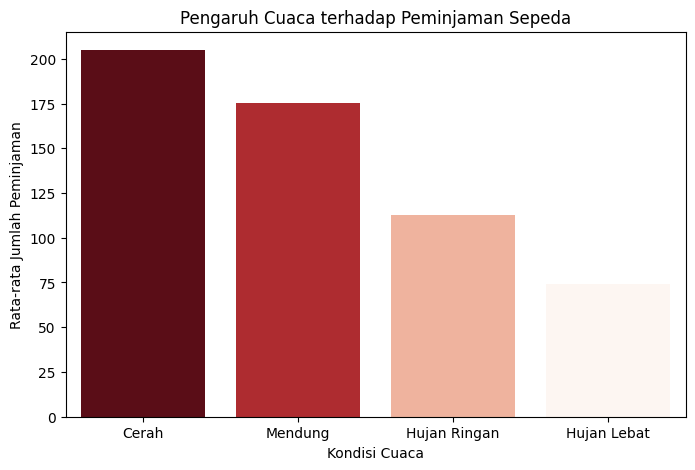

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt

weather_usage = hour_df_cleaned.groupby('weathersit')['cnt'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=weather_usage.index, y=weather_usage.values,hue= weather_usage.values, palette='Reds', legend=False)
plt.title('Pengaruh Cuaca terhadap Peminjaman Sepeda')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Jumlah Peminjaman')
plt.xticks([0, 1, 2, 3], ['Cerah', 'Mendung', 'Hujan Ringan', 'Hujan Lebat'])
plt.show()


**Insight:**
- Peminjaman sepeda tertinggi terjadi saat cuaca cerah (weathersit = 1).
- Peminjaman menurun saat cuaca memburuk (mendung dan hujan ringan).
- Peminjaman jauh lebih rendah saat hujan lebat (weathersit = 4).

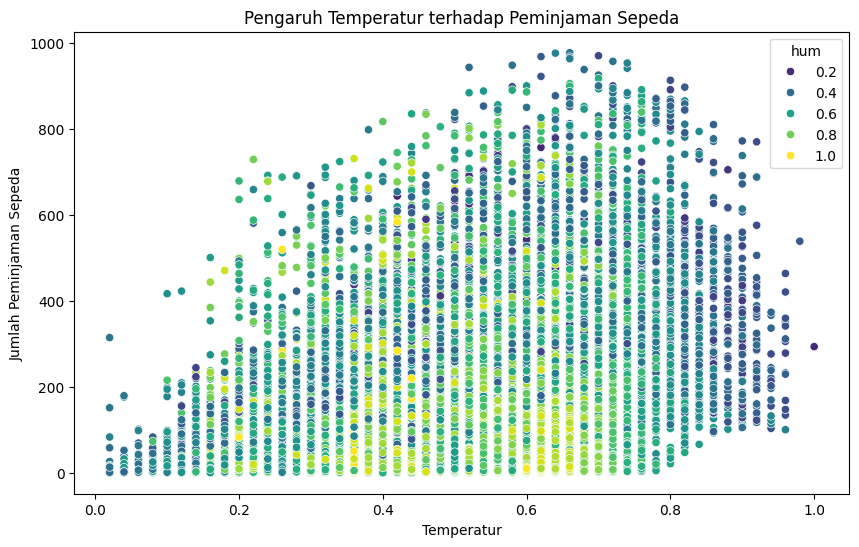

In [131]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=hour_df_cleaned, palette='viridis', hue='hum')
plt.title('Pengaruh Temperatur terhadap Peminjaman Sepeda')
plt.xlabel('Temperatur')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.show()

**Insight:**
- Peminjaman sepeda cenderung meningkat seiring dengan kenaikan temperatur
- Kelembaban memoderasi pengaruh temperatur. Pada temperatur tinggi, kelembaban tinggi dapat mengurangi jumlah peminjaman sepeda.
- Puncak tertinggi peminjaman sepeda terjadi di kondisi temperatur kisaran 0.6-0.8 dengan kondisi kelembaban kisaran 0.2-0.6


### Pertanyaan 2: Bagaimana Perbandingan Jumlah Peminjaman Sepeda antara Hari Kerja, Akhir Pekan, dan Hari Libur?

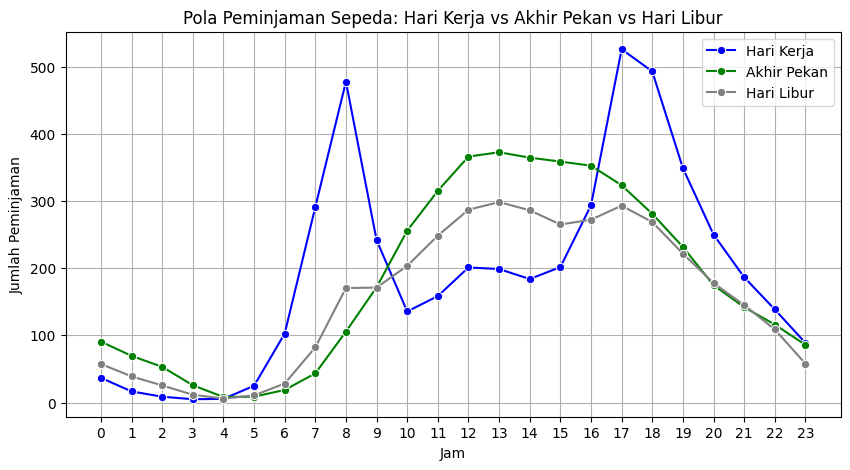

In [132]:
# Membagi data menjadi hari kerja dan akhir pekan
df_workingday = hour_df_cleaned[hour_df_cleaned['workingday'] == 1]
df_weekend = hour_df_cleaned[hour_df_cleaned['workingday'] == 0]
df_holiday = hour_df_cleaned[hour_df_cleaned['holiday'] == 1]

# Mengelompokkan dan menghitung rata-rata peminjaman berdasarkan jam
hourly_workingday = df_workingday.groupby('hr')['cnt'].mean()
hourly_weekend = df_weekend.groupby('hr')['cnt'].mean()
hourly_holiday = df_holiday.groupby('hr')['cnt'].mean()

# Visualisasi perbandingan pola peminjaman
plt.figure(figsize=(10, 5))
sns.lineplot(x=hourly_workingday.index, y=hourly_workingday.values, marker='o', label='Hari Kerja', color='blue')
sns.lineplot(x=hourly_weekend.index, y=hourly_weekend.values, marker='o', label='Akhir Pekan', color='green')
sns.lineplot(x=hourly_holiday.index, y=hourly_holiday.values, marker='o', label='Hari Libur', color='grey')
plt.title('Pola Peminjaman Sepeda: Hari Kerja vs Akhir Pekan vs Hari Libur')
plt.xlabel('Jam')
plt.ylabel('Jumlah Peminjaman')
plt.xticks(range(0, 24))
plt.legend()
plt.grid()
plt.show()


**Insight:**
- Hari kerja memiliki dua puncak peminjaman (7 pagi dan 5 sore), kemungkinan saat jam berangkat dan pulang kerja.
- Akhir pekan dan hari libur memiliki pola yang lebih merata, dengan puncak lebih tinggi di siang hari (jam 1 siang).
- Peminjaman di hari libur lebih tinggi dibanding hari kerja di beberapa jam tertentu.

### Pertanyaan 3: Apakah Peminjaman Sepeda Meningkat atau Menurun pada Tahun 2012 Dibanding Tahun 2011?

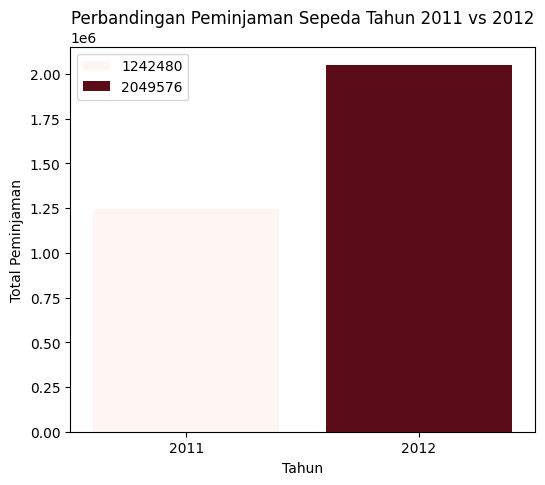

In [133]:
yearly_usage = hour_df_cleaned.groupby('yr')['cnt'].sum()

plt.figure(figsize=(6, 5))
sns.barplot(x=yearly_usage.index, y=yearly_usage.values, hue=yearly_usage.values, palette='Reds')
plt.title('Perbandingan Peminjaman Sepeda Tahun 2011 vs 2012')
plt.xlabel('Tahun')
plt.ylabel('Total Peminjaman')
plt.xticks([0, 1], ['2011', '2012'])
plt.show()

**Insight:**
- Jumlah peminjaman sepeda meningkat signifikan pada tahun 2012 dibanding 2011.

## Conclusion

- Kondisi cuaca merupakan faktor yang mempengaruhi peminjaman sepeda. Semakin baik kondisi cuaca (cerah, suhu hangat, kelembapan sedang), semakin tinggi jumlah peminjaman sepeda. Puncak peminjaman terjadi pada suhu kisaran 24.6°C - 32.8°C dengan kelembapan 20%-60%. Hal ini didukung dengan data peminjaman sepeda tertinggi sebesar 977 sepeda yang memiliki kondisi cuaca yang cerah (weathersit = 1),temperatur pada 27 derajat celcius, dan kelembaban 44%. Peminjaman sepeda cenderung menurun saat kondisi cuaca memburuk, terutama saat hujan lebat atau badai. Walaupun peminjaman terendah terjadi pada kondisi cuaca hujan lebat (weathersit=4), harus dikethaui bahwa hanya terdapat 3 buah data yang memiliki kondisi cuaca hujan lebat.
- Pada hari kerja terdapat 2 puncak tertinggi peminjaman sepeda yaitu pada jam 7 pagi dan 5 sore, hal ini dapat disebabkan oleh jam pergi kerja dan jam pulang kerja. Setelah pukul 7 pagi dan 5 sore jumlah peminjaman sepeda menurun drastis pada hari kerja. Sedangkan pada akhir pekan dan hari libur peminjaman sepeda memiliki pola yang lebih merata, dengan puncak yang lebih tinggi tejadi pada siang hingga sore hari. Peminjaman sepedah tertinggi sebesar 977 peminjaman sepeda terjadi di hari kerja dan di pukul 6 sore.
- Total Peminjaman sepeda pada tahun 2011 sebesar 1242480 peminjaman sepeda sedangkan di tahun 2012 sebesar 2049576 peminjaman sepeda. Dari kedua angka tersebut dapat diketahui bahwa terjadi kenaikan peminjaman sepeda dari tahun 2011 ke tahun 2012 sebesar 807096, sehingga peminjaman sepeda pada tahun 2012 meningkat 65% dari tahun sebelumnya.





---



data dengan jumlah peminjaman sepeda terbanyak

In [134]:
max_cnt_row = hour_df_cleaned.loc[hour_df_cleaned['cnt'].idxmax()]

print("Weather Situation:", max_cnt_row['weathersit'])
print("Temperature:", max_cnt_row['temp'])
print("Humidity:", max_cnt_row['hum'])
print("Hour:", max_cnt_row['hr'])
print("Working day:", max_cnt_row['workingday'])
print("Count:", max_cnt_row['cnt'])


Weather Situation: 1
Temperature: 0.66
Humidity: 0.44
Hour: 18
Working day: 1
Count: 977
